<img style="float: right;" src="img/openhouse_logo.png" width="200" height="200"/><br>

# <center> <ins> House Price Prediction Coding Test <br><br> Linear-Regression <ins> </center>
### <center>by: Daniel Lachner-Piza, PhD <br> for: OpenHouse.ai </center>




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import etl.data_loader as dl
import eda.eda_engine as eda

# 1.Data Loading <a class="data-loading"></a>

In [2]:
# Import the dataset using the DataLoader class, which wraps several file types into one single data reader.
data_loader = dl.DataLoader("data/dataset.csv")
raw_df = data_loader.load_data()

# 2. Raw Data Exploration

In [3]:
eda_engine = eda.EDA_Engine(raw_df)
eda_engine.overview()
eda_engine.numerical_values()
eda_engine.categorical_values()

Dataset Shape: (1460, 22)


Data Types:
LotArea               int64
GrLivArea             int64
Street               object
Alley                object
LotType              object
BldgType             object
HouseStyle           object
OverallQuality        int64
OverallCondition      int64
YearBuilt             int64
Foundation           object
TotalBsmtSF           int64
CentralAir           object
FullBath              int64
HalfBath              int64
GarageType           object
GarageCars            int64
GarageArea          float64
YearSold              int64
SaleType             object
SaleCondition        object
SalePrice             int64
dtype: object


First few rows:
   LotArea  GrLivArea Street Alley  LotType BldgType HouseStyle  \
0     8910       1194   Pave   NaN   Corner     1Fam       1Fam   
1     1526        630   Pave   NaN   Inside    Twnhs     SFoyer   
2    14598       1933   Pave   NaN  CulDSac     1Fam     2Story   
3     7200       1040   Pave   NaN   Inside 

# 3.Data Cleaning

### <ins> 3.1. Handle NaNs <ins>

#### Drop column "Alley" because 94% of its entries are NaN

In [4]:
clean_df = raw_df.drop(["Alley"], axis='columns').copy()

#### Drop rows where any column ( in this case "GarageType" and "GarageArea") contains NaNs

In [5]:
clean_df = clean_df.dropna(axis='index', how='any')

In [6]:
print(f"Nr. Dropped Rows: {raw_df.shape[0]-clean_df.shape[0]} ({100*(1-(clean_df.shape[0]/raw_df.shape[0])):.2f}%)")

Nr. Dropped Rows: 124 (8.49%)


#### Check again for NaNs and duplicate rows

In [7]:
eda_engine = eda.EDA_Engine(clean_df)
eda_engine.missing_values()
eda_engine.duplicates()

0 Column: LotArea --- Missing values: 0 --- Percentage: 0.00%
1 Column: GrLivArea --- Missing values: 0 --- Percentage: 0.00%
2 Column: Street --- Missing values: 0 --- Percentage: 0.00%
3 Column: LotType --- Missing values: 0 --- Percentage: 0.00%
4 Column: BldgType --- Missing values: 0 --- Percentage: 0.00%
5 Column: HouseStyle --- Missing values: 0 --- Percentage: 0.00%
6 Column: OverallQuality --- Missing values: 0 --- Percentage: 0.00%
7 Column: OverallCondition --- Missing values: 0 --- Percentage: 0.00%
8 Column: YearBuilt --- Missing values: 0 --- Percentage: 0.00%
9 Column: Foundation --- Missing values: 0 --- Percentage: 0.00%
10 Column: TotalBsmtSF --- Missing values: 0 --- Percentage: 0.00%
11 Column: CentralAir --- Missing values: 0 --- Percentage: 0.00%
12 Column: FullBath --- Missing values: 0 --- Percentage: 0.00%
13 Column: HalfBath --- Missing values: 0 --- Percentage: 0.00%
14 Column: GarageType --- Missing values: 0 --- Percentage: 0.00%
15 Column: GarageCars --- M

### <ins> 3.2 Clean categorical values <ins> 
- Clean entries with the value "Do Not use this Field in the Model". Assign them a shorter value
- Clean entries that are the same but written with a different case (e.g. "Normal" and "normal")

In [8]:
print("Before cleaning")
eda_engine.categorical_values()

Before cleaning
Categorical values (Unique entrees %):

Column: Street --- Nr.Uniques : 2
Pave: 99.63%
Grvl: 0.37%


Categorical Columns:Index(['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation',
       'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Column: LotType --- Nr.Uniques : 5
Corner: 18.04%
Inside: 71.71%
CulDSac: 6.74%
FR2: 3.22%
FR3: 0.30%


Categorical Columns:Index(['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation',
       'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Column: BldgType --- Nr.Uniques : 5
1Fam: 84.51%
Twnhs: 2.69%
Duplex: 2.99%
TwnhsE: 8.23%
2fmCon: 1.57%


Categorical Columns:Index(['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation',
       'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Column: HouseStyle --- Nr.Uniques : 9
1Fam: 0.07%
SFoyer: 2.32%
2Story: 31.14%
1Story: 49.93%
2.5Unf: 0.75%
2.5Fin: 0.37%
1.5Fin: 10.25%
SLvl: 4.

In [9]:
col_name = 'Foundation'
unique_val = "Do Not use this Field in the Model"
clean_df.loc[clean_df[col_name].str.fullmatch(unique_val, case=True), col_name] = 'Unknown'

In [10]:
col_name = 'SaleCondition'
unique_val = "normal"
clean_df.loc[clean_df[col_name].str.fullmatch(unique_val, case=True), col_name] = 'Normal'

In [11]:
print("After cleaning")
eda_engine = eda.EDA_Engine(clean_df)
eda_engine.categorical_values()
eda_engine.numerical_values()

After cleaning
Categorical values (Unique entrees %):

Column: Street --- Nr.Uniques : 2
Pave: 99.63%
Grvl: 0.37%


Categorical Columns:Index(['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation',
       'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Column: LotType --- Nr.Uniques : 5
Corner: 18.04%
Inside: 71.71%
CulDSac: 6.74%
FR2: 3.22%
FR3: 0.30%


Categorical Columns:Index(['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation',
       'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Column: BldgType --- Nr.Uniques : 5
1Fam: 84.51%
Twnhs: 2.69%
Duplex: 2.99%
TwnhsE: 8.23%
2fmCon: 1.57%


Categorical Columns:Index(['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation',
       'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Column: HouseStyle --- Nr.Uniques : 9
1Fam: 0.07%
SFoyer: 2.32%
2Story: 31.14%
1Story: 49.93%
2.5Unf: 0.75%
2.5Fin: 0.37%
1.5Fin: 10.25%
SLvl: 4.6

### <ins> 3.3. Explore the dataset and categorize each feature as numerical, categorical or ordinal<ins> 

In [12]:
contin_num_cols = ['LotArea', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea']
ordinal_cols = ['OverallQuality','OverallCondition','FullBath','HalfBath','GarageCars','YearSold']
categorical_columns = ['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition']
print(f"Numerical Columns: {contin_num_cols}")
print(f"Ordinal Columns: {ordinal_cols}")
print(f"Categorical Columns: {categorical_columns}")

Numerical Columns: ['LotArea', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea']
Ordinal Columns: ['OverallQuality', 'OverallCondition', 'FullBath', 'HalfBath', 'GarageCars', 'YearSold']
Categorical Columns: ['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition']


In [13]:
df_numerical = clean_df[contin_num_cols].copy()
df_ordinal = clean_df[ordinal_cols].copy()
df_categorical = clean_df[categorical_columns].copy()
y_df = clean_df['SalePrice'].copy()

In [14]:
print("Numerical Features")
eda_engine = eda.EDA_Engine(df_numerical)
eda_engine.categorical_values()
eda_engine.numerical_values()

Numerical Features
Categorical values (Unique entrees %):

Numerical values (Summarizing Stats %):

0 Column: LotArea --- Nr.Uniques: 992 --- Min.: 1300.00 --- Max.: 215245.00 --- Mean: 10720.67 --- Median: 9579.50 --- StdDev: 10351.69
1 Column: GrLivArea --- Nr.Uniques: 815 --- Min.: 438.00 --- Max.: 23400.00 --- Mean: 1587.73 --- Median: 1480.00 --- StdDev: 1103.06
2 Column: YearBuilt --- Nr.Uniques: 109 --- Min.: 1880.00 --- Max.: 2010.00 --- Mean: 1972.83 --- Median: 1976.00 --- StdDev: 29.46
3 Column: TotalBsmtSF --- Nr.Uniques: 695 --- Min.: 0.00 --- Max.: 6110.00 --- Mean: 1073.50 --- Median: 1008.00 --- StdDev: 438.59
4 Column: GarageArea --- Nr.Uniques: 434 --- Min.: 160.00 --- Max.: 1418.00 --- Mean: 499.99 --- Median: 484.00 --- StdDev: 185.40




In [15]:
print("Ordinal Features")
eda_engine = eda.EDA_Engine(df_ordinal)
eda_engine.categorical_values()
eda_engine.numerical_values()

Ordinal Features
Categorical values (Unique entrees %):

Numerical values (Summarizing Stats %):

0 Column: OverallQuality --- Nr.Uniques: 9 --- Min.: 2.00 --- Max.: 10.00 --- Mean: 6.17 --- Median: 6.00 --- StdDev: 1.34
1 Column: OverallCondition --- Nr.Uniques: 8 --- Min.: 2.00 --- Max.: 9.00 --- Mean: 5.58 --- Median: 5.00 --- StdDev: 1.09
2 Column: FullBath --- Nr.Uniques: 4 --- Min.: 0.00 --- Max.: 3.00 --- Mean: 1.58 --- Median: 2.00 --- StdDev: 0.55
3 Column: HalfBath --- Nr.Uniques: 3 --- Min.: 0.00 --- Max.: 2.00 --- Mean: 0.39 --- Median: 0.00 --- StdDev: 0.50
4 Column: GarageCars --- Nr.Uniques: 4 --- Min.: 1.00 --- Max.: 4.00 --- Mean: 1.87 --- Median: 2.00 --- StdDev: 0.63
5 Column: YearSold --- Nr.Uniques: 5 --- Min.: 2006.00 --- Max.: 2010.00 --- Mean: 2007.81 --- Median: 2008.00 --- StdDev: 1.34




In [16]:
print("Categorical Features")
eda_engine = eda.EDA_Engine(df_categorical)
eda_engine.categorical_values()
eda_engine.numerical_values()

Categorical Features
Categorical values (Unique entrees %):

Column: Street --- Nr.Uniques : 2
Pave: 99.63%
Grvl: 0.37%


Categorical Columns:Index(['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation',
       'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Column: LotType --- Nr.Uniques : 5
Corner: 18.04%
Inside: 71.71%
CulDSac: 6.74%
FR2: 3.22%
FR3: 0.30%


Categorical Columns:Index(['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation',
       'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Column: BldgType --- Nr.Uniques : 5
1Fam: 84.51%
Twnhs: 2.69%
Duplex: 2.99%
TwnhsE: 8.23%
2fmCon: 1.57%


Categorical Columns:Index(['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation',
       'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

Column: HouseStyle --- Nr.Uniques : 9
1Fam: 0.07%
SFoyer: 2.32%
2Story: 31.14%
1Story: 49.93%
2.5Unf: 0.75%
2.5Fin: 0.37%
1.5Fin: 10.25%
SLv

### <ins> Inspect each feature and its relationship with the target

In [17]:
df_numerical
df_ordinal
df_categorical
y_df

contin_num_cols = ['LotArea', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea']
ordinal_cols = ['OverallQuality','OverallCondition','FullBath','HalfBath','GarageCars','YearSold']
categorical_columns = ['Street', 'LotType', 'BldgType', 'HouseStyle', 'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition']



# Continous Numerical Features

In [ ]:
df = df_numerical.copy()
df['price'] = y_df.to_numpy()
for feat_name in contin_num_cols:
    fig = plt.figure(figsize = (5,10))
    ax = fig.subplots()
    sns.boxplot(data=df, x=feat_name,y='price', hue=feat_name, ax=ax);
    plt.xticks(rotation=90);

# Ordinal Features

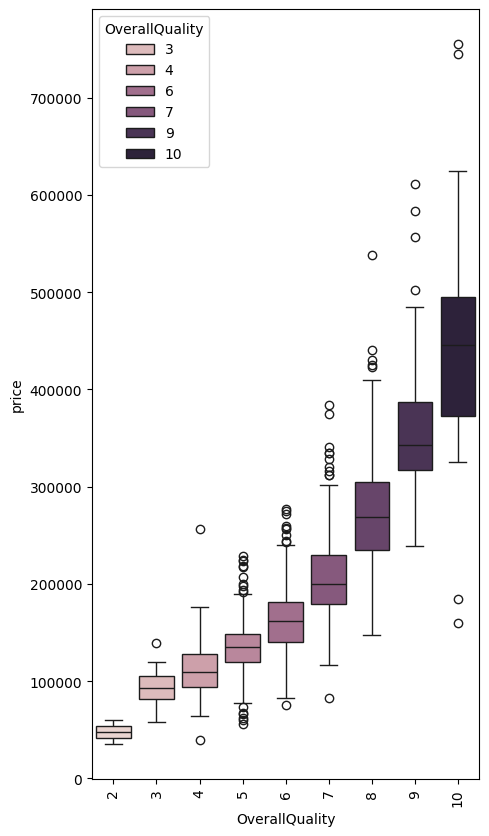

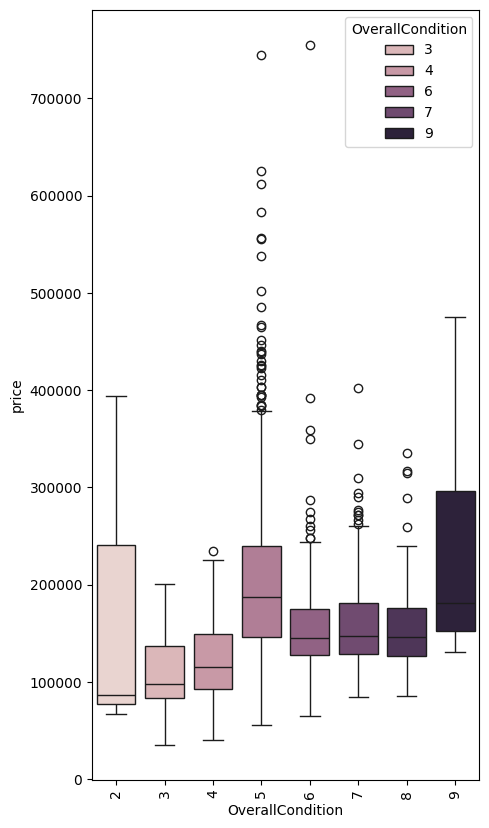

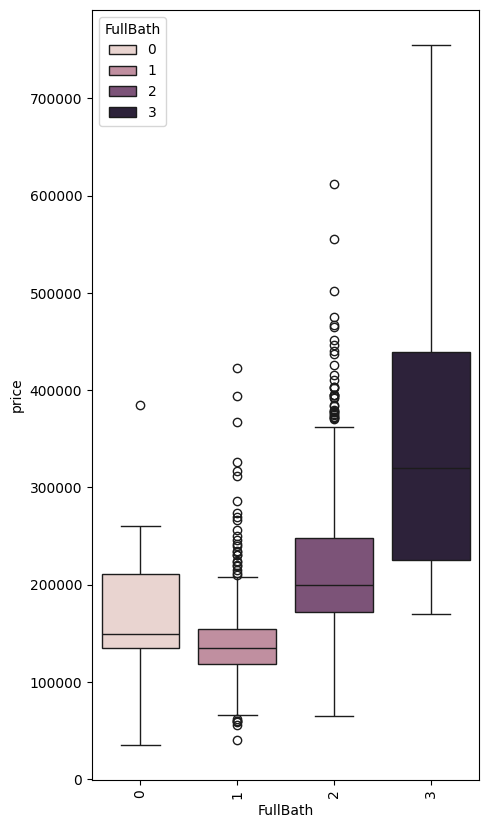

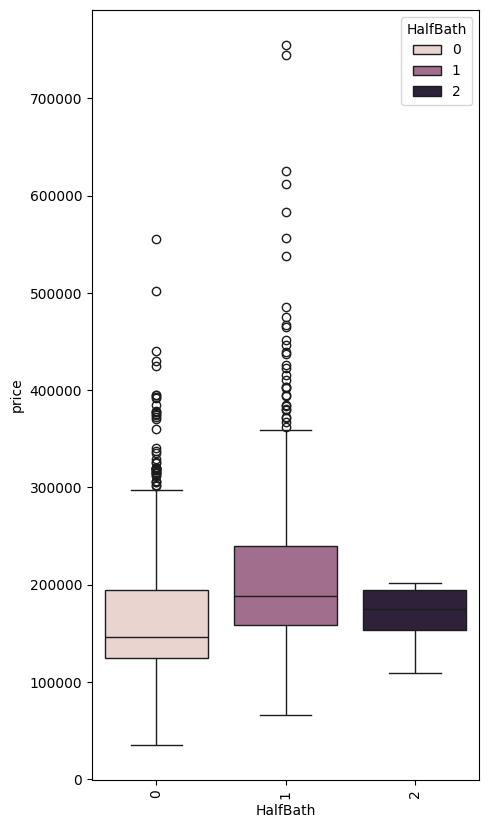

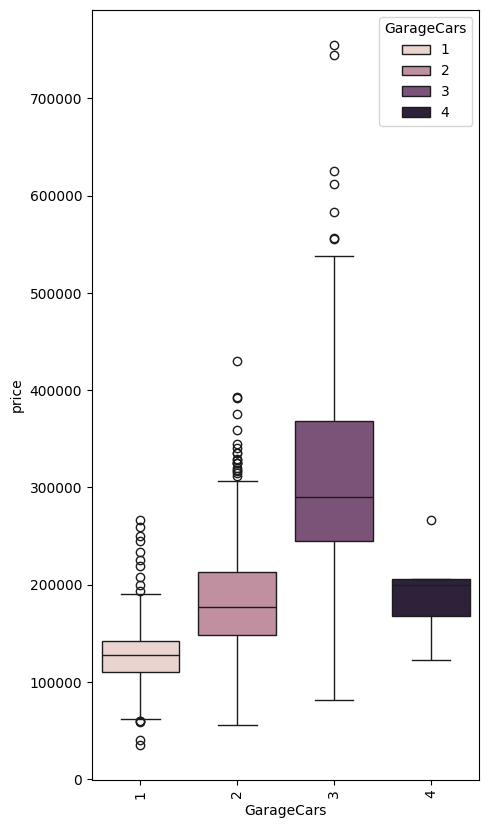

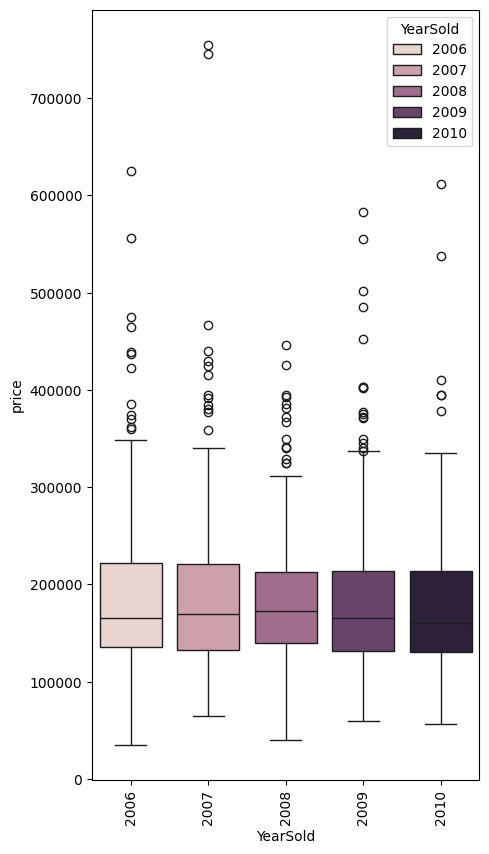

In [19]:
df = df_ordinal.copy()
df['price'] = y_df.to_numpy()
for feat_name in ordinal_cols:
    fig = plt.figure(figsize = (5,10))
    ax = fig.subplots()
    sns.boxplot(data=df, x=feat_name,y='price', hue=feat_name, ax=ax);
    plt.xticks(rotation=90);

# Categorical Features

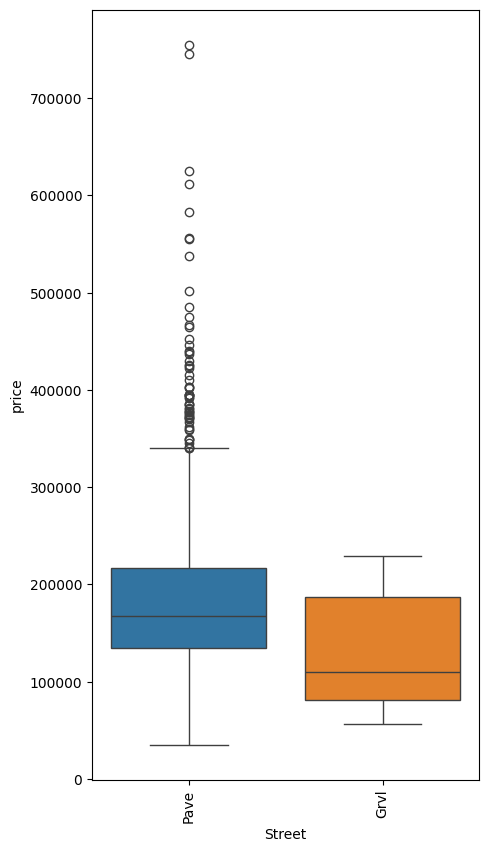

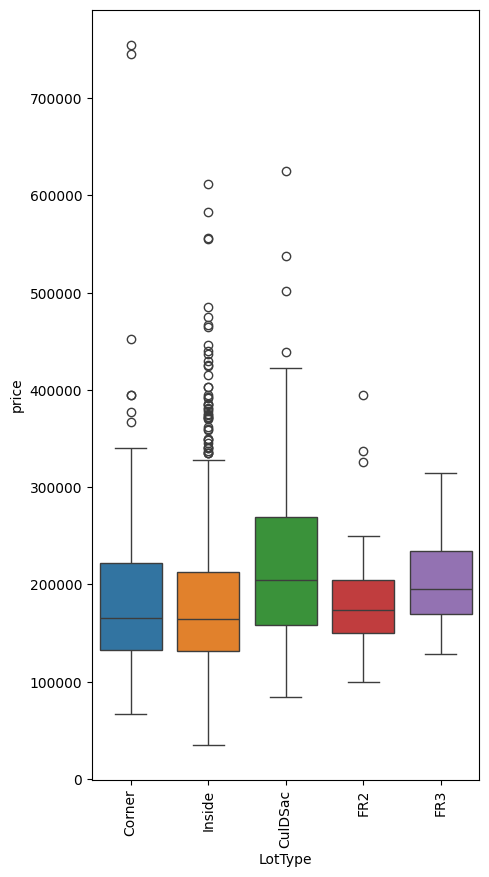

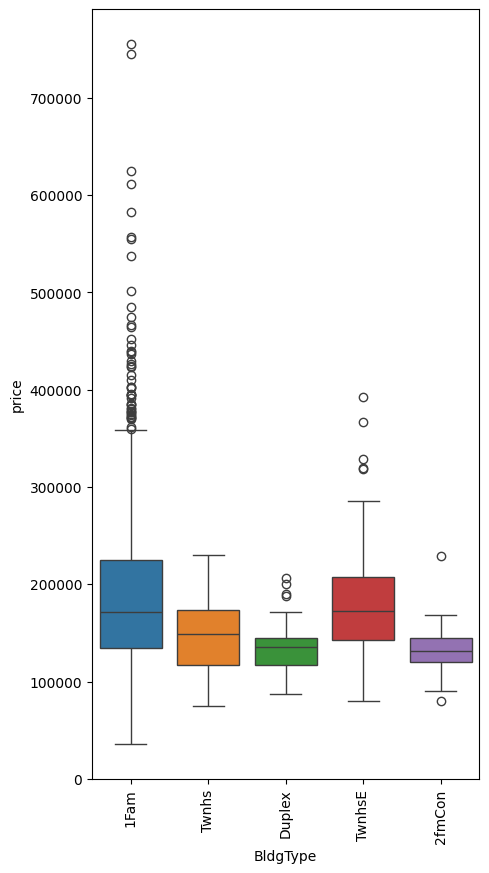

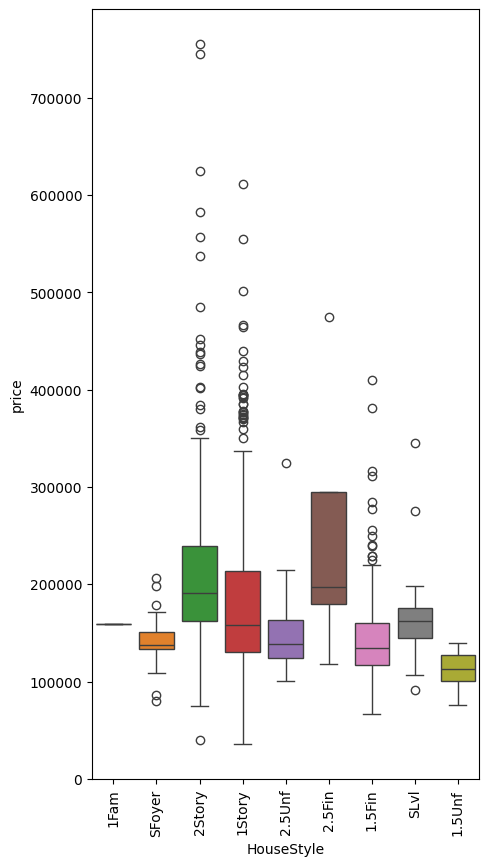

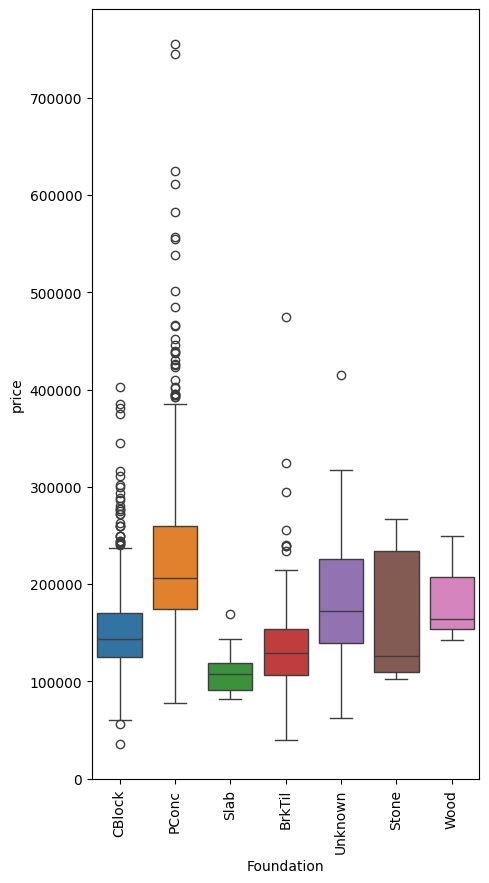

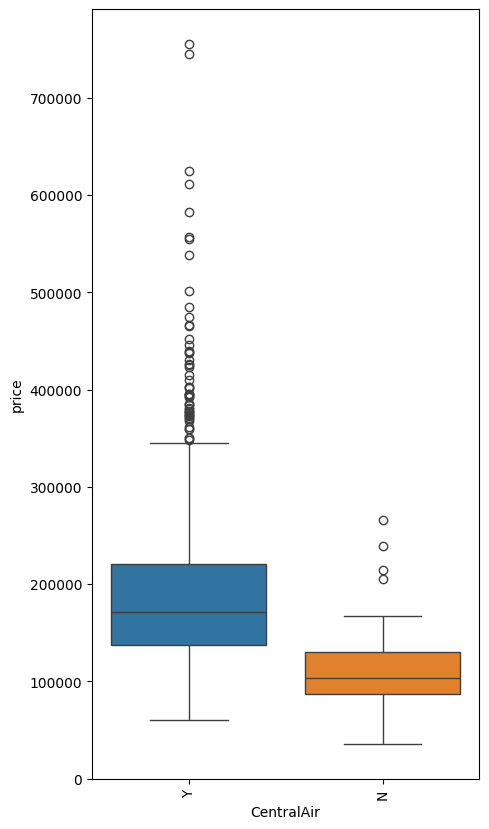

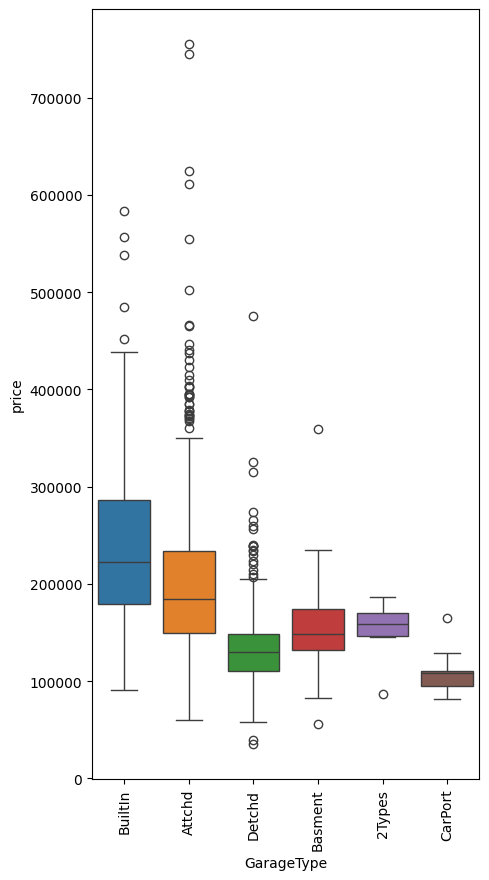

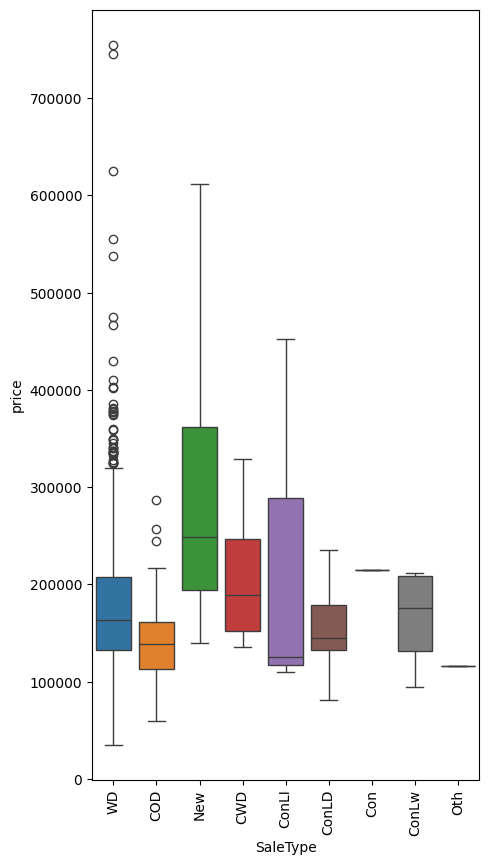

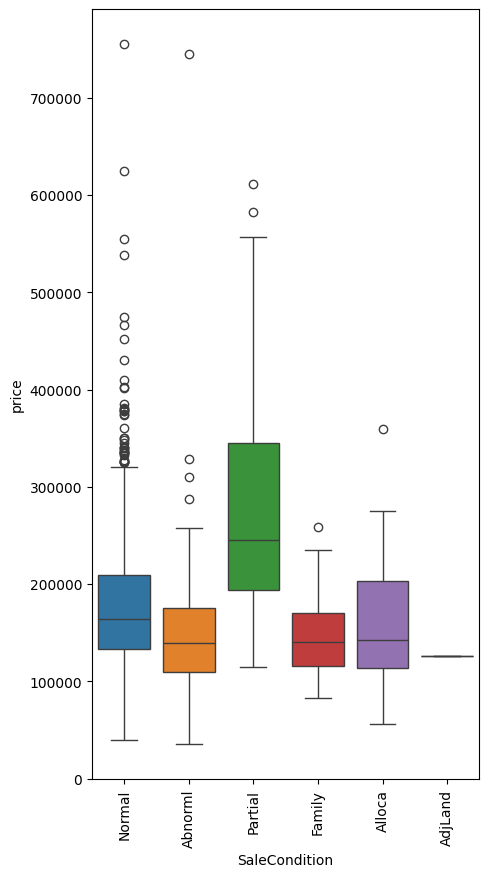

In [21]:
df = df_categorical.copy()
df['price'] = y_df.to_numpy()
for feat_name in categorical_columns:
    fig = plt.figure(figsize = (5,10))
    ax = fig.subplots()
    sns.boxplot(data=df, x=feat_name,y='price', hue=feat_name, ax=ax);
    plt.xticks(rotation=90);